# Exploration de donnée rapide 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
data = pd.read_csv(
    'tiktokMediasFranco.csv'
)

data

,compte,dateHeure,description,nbCommentaires,nbLikes,nbVues,nbPartages,texteSurimposé,url,durée,musiqueTitre,musiqueArtiste
0,infobref,2022-11-26 10:06:51,Les prix de l’#immobilier au Canada vont baiss...,0,17,551,6,NaN,https://www.tiktok.com/@infobref/video/7170341...,166,son original,InfoBref
1,infobref,2022-11-18 10:04:06,#TWITTER survivra-t-il à #ELONMUSK? À retenir ...,0,1,137,0,NaN,https://www.tiktok.com/@infobref/video/7167370...,595,son original - InfoBref,InfoBref
2,infobref,2022-11-11 13:42:35,Le chemin du métavers est pénible pour Meta | ...,0,1,25,0,NaN,https://www.tiktok.com/@infobref/video/7164830...,577,son original,InfoBref
3,infobref,2022-11-05 08:25:36,#ElonMusk fait le ménage chez #Twitter | Nouve...,0,1,88,0,NaN,https://www.tiktok.com/@infobref/video/7162507...,534,son original,InfoBref
4,infobref,2022-10-30 14:28:43,À retenir dans l'actualité des #affaires: on v...,0,0,11,0,NaN,https://www.tiktok.com/@infobref/video/7160374...,587,son original,InfoBref
...,...,...,...,...,...,...,...,...,...,...,...,...
13238,hugodecrypte,2019-11-22 11:52:26,70 chars de guerre défilent dans les rues en B...,8,933,18400,4,Chaque année en Belgique. Il y a le + grand ra...,https://www.tiktok.com/@hugodecrypte/video/676...,29,son original,hugodecrypte
13239,hugodecrypte,2019-11-21 08:40:41,Emma Watson en 8 dates #foryou #pourtoi #emmaw...,5,773,5144,5,EMMA WATSON \nen 8 dates. 2001 : son premier f...,https://www.tiktok.com/@hugodecrypte/video/676...,28,On Top Of The World,Imagine Dragons
13240,hugodecrypte,2019-11-20 05:58:04,Ils lisent 500 pages en 1h30 !Reportage sur no...,32,1153,11000,32,Ils lisent 500 pages \nen 1h30. C’est le champ...,https://www.tiktok.com/@hugodecrypte/video/676...,31,son original,hugodecrypte
13241,hugodecrypte,2019-11-18 04:04:04,Omar Sy en 8 dates #foryou #pourtoi #hugodecry...,6,617,8763,3,OMAR SY \nen 8 dates. 1995 : sa rencontre \nav...,https://www.tiktok.com/@hugodecrypte/video/676...,28,Believer,Imagine Dragons


In [3]:
# Transformation du dataset pour l'ajout d'une colonne pays
media_to_country = {
    'infobref':"Canada",
    'latribune':"Canada",
    'lavoixdunord':"France",
    'ledevoir':"Canada",
    'heidi.news':"Suisse",
    'tdg.ch':"Suisse",
    'letemps':"Suisse",
    'leprogres.lyon':"France",
    'sudouestfr':"France",
    'journalmetro':"Canada",
    'radio.canada.info':"Canada",
    'rtlinfo':"Belgique",
    'majmonactu':"Canada",
    'noovo.info':"Canada",
    'ouestfrance':"France",
    'radpointca':"Canada",
    '24heuresca':"Canada",
    '_urbania':"Canada",
    'tvasports':"Canada",
    'rds.ca':"Canada",
    'lefigarofr':"France",
    'miseajour':"Belgique",
    'rtsinfo':"Suisse",
    'loopsider':"France",
    'lequipe':"France",
    'tf1info':"France",
    'leparisien':"France",
    'franceinfo':"France",
    'lemondefr':"France",
    'rmcsport':"France",
    'bfmtv':"France",
    'konbini':"France",
    'brutofficiel':"France",
    'hugodecrypte':"France"
}

data['pays'] = [media_to_country[media] for media in data['compte']]
data

,compte,dateHeure,description,nbCommentaires,nbLikes,nbVues,nbPartages,texteSurimposé,url,durée,musiqueTitre,musiqueArtiste,pays
0,infobref,2022-11-26 10:06:51,Les prix de l’#immobilier au Canada vont baiss...,0,17,551,6,NaN,https://www.tiktok.com/@infobref/video/7170341...,166,son original,InfoBref,Canada
1,infobref,2022-11-18 10:04:06,#TWITTER survivra-t-il à #ELONMUSK? À retenir ...,0,1,137,0,NaN,https://www.tiktok.com/@infobref/video/7167370...,595,son original - InfoBref,InfoBref,Canada
2,infobref,2022-11-11 13:42:35,Le chemin du métavers est pénible pour Meta | ...,0,1,25,0,NaN,https://www.tiktok.com/@infobref/video/7164830...,577,son original,InfoBref,Canada
3,infobref,2022-11-05 08:25:36,#ElonMusk fait le ménage chez #Twitter | Nouve...,0,1,88,0,NaN,https://www.tiktok.com/@infobref/video/7162507...,534,son original,InfoBref,Canada
4,infobref,2022-10-30 14:28:43,À retenir dans l'actualité des #affaires: on v...,0,0,11,0,NaN,https://www.tiktok.com/@infobref/video/7160374...,587,son original,InfoBref,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13238,hugodecrypte,2019-11-22 11:52:26,70 chars de guerre défilent dans les rues en B...,8,933,18400,4,Chaque année en Belgique. Il y a le + grand ra...,https://www.tiktok.com/@hugodecrypte/video/676...,29,son original,hugodecrypte,France
13239,hugodecrypte,2019-11-21 08:40:41,Emma Watson en 8 dates #foryou #pourtoi #emmaw...,5,773,5144,5,EMMA WATSON \nen 8 dates. 2001 : son premier f...,https://www.tiktok.com/@hugodecrypte/video/676...,28,On Top Of The World,Imagine Dragons,France
13240,hugodecrypte,2019-11-20 05:58:04,Ils lisent 500 pages en 1h30 !Reportage sur no...,32,1153,11000,32,Ils lisent 500 pages \nen 1h30. C’est le champ...,https://www.tiktok.com/@hugodecrypte/video/676...,31,son original,hugodecrypte,France
13241,hugodecrypte,2019-11-18 04:04:04,Omar Sy en 8 dates #foryou #pourtoi #hugodecry...,6,617,8763,3,OMAR SY \nen 8 dates. 1995 : sa rencontre \nav...,https://www.tiktok.com/@hugodecrypte/video/676...,28,Believer,Imagine Dragons,France


In [4]:
# Transformation du dataset pour la séparation de la date et heure
data["dateHeure"] = pd.to_datetime(data["dateHeure"], format="%Y-%m-%d %H:%M:%S")

In [5]:
data['date'] = [dateheure.date() for dateheure in data['dateHeure']]
data['time'] = [dateheure.time() for dateheure in data['dateHeure']]
data = data.drop(columns=['dateHeure'])

data

,compte,description,nbCommentaires,nbLikes,nbVues,nbPartages,texteSurimposé,url,durée,musiqueTitre,musiqueArtiste,pays,date,time
0,infobref,Les prix de l’#immobilier au Canada vont baiss...,0,17,551,6,NaN,https://www.tiktok.com/@infobref/video/7170341...,166,son original,InfoBref,Canada,2022-11-26,10:06:51
1,infobref,#TWITTER survivra-t-il à #ELONMUSK? À retenir ...,0,1,137,0,NaN,https://www.tiktok.com/@infobref/video/7167370...,595,son original - InfoBref,InfoBref,Canada,2022-11-18,10:04:06
2,infobref,Le chemin du métavers est pénible pour Meta | ...,0,1,25,0,NaN,https://www.tiktok.com/@infobref/video/7164830...,577,son original,InfoBref,Canada,2022-11-11,13:42:35
3,infobref,#ElonMusk fait le ménage chez #Twitter | Nouve...,0,1,88,0,NaN,https://www.tiktok.com/@infobref/video/7162507...,534,son original,InfoBref,Canada,2022-11-05,08:25:36
4,infobref,À retenir dans l'actualité des #affaires: on v...,0,0,11,0,NaN,https://www.tiktok.com/@infobref/video/7160374...,587,son original,InfoBref,Canada,2022-10-30,14:28:43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13238,hugodecrypte,70 chars de guerre défilent dans les rues en B...,8,933,18400,4,Chaque année en Belgique. Il y a le + grand ra...,https://www.tiktok.com/@hugodecrypte/video/676...,29,son original,hugodecrypte,France,2019-11-22,11:52:26
13239,hugodecrypte,Emma Watson en 8 dates #foryou #pourtoi #emmaw...,5,773,5144,5,EMMA WATSON \nen 8 dates. 2001 : son premier f...,https://www.tiktok.com/@hugodecrypte/video/676...,28,On Top Of The World,Imagine Dragons,France,2019-11-21,08:40:41
13240,hugodecrypte,Ils lisent 500 pages en 1h30 !Reportage sur no...,32,1153,11000,32,Ils lisent 500 pages \nen 1h30. C’est le champ...,https://www.tiktok.com/@hugodecrypte/video/676...,31,son original,hugodecrypte,France,2019-11-20,05:58:04
13241,hugodecrypte,Omar Sy en 8 dates #foryou #pourtoi #hugodecry...,6,617,8763,3,OMAR SY \nen 8 dates. 1995 : sa rencontre \nav...,https://www.tiktok.com/@hugodecrypte/video/676...,28,Believer,Imagine Dragons,France,2019-11-18,04:04:04


In [6]:
data.to_csv('tiktokMediasFranco_v2.csv')

In [7]:
data.columns

Index(['compte', 'description', 'nbCommentaires', 'nbLikes', 'nbVues',
       'nbPartages', 'texteSurimposé', 'url', 'durée', 'musiqueTitre',
       'musiqueArtiste', 'pays', 'date', 'time'],
      dtype='object')

In [8]:
def quick_numeric_column_info(data, col_name):
    print("Minimum : " + str(min(data[col_name])))
    print("Maximum : " + str(max(data[col_name])))
    print("Moyenne : " + str(data[col_name].mean()))
    print("Médiane : " + str(data[col_name].median()))
    total = len(data)
    missing = sum(data[col_name].isna())
    print("La colunne " + str(col_name) + " contient " +str(missing) + "("+str(missing/total)+"%) valeurs manquantes.")
    fig = data[col_name].plot()
    fig.set_xlabel("ID de la publication")
    fig.set_ylabel(col_name)

Minimum : 0
Maximum : 24700
Moyenne : 395.1644642452616
Médiane : 48.0
La colunne nbCommentaires contient 0(0.0%) valeurs manquantes.


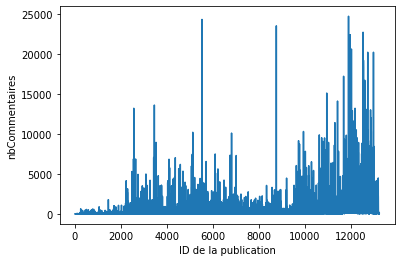

In [9]:
quick_numeric_column_info(data, 'nbCommentaires')

Minimum : 0
Maximum : 1200000
Moyenne : 26632.527146416975
Médiane : 3120.0
La colunne nbLikes contient 0(0.0%) valeurs manquantes.


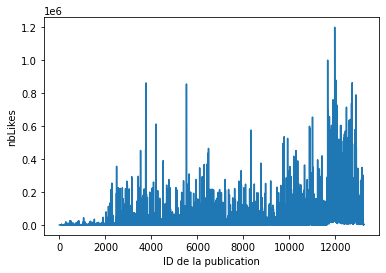

In [10]:
quick_numeric_column_info(data, 'nbLikes')

Minimum : 0
Maximum : 11500000
Moyenne : 274339.8435399834
Médiane : 45000.0
La colunne nbVues contient 0(0.0%) valeurs manquantes.


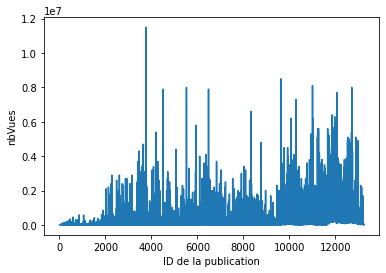

In [11]:
quick_numeric_column_info(data, 'nbVues')

Minimum : 0
Maximum : 4500000
Moyenne : 913.1749603564147
Médiane : 26.0
La colunne nbPartages contient 0(0.0%) valeurs manquantes.


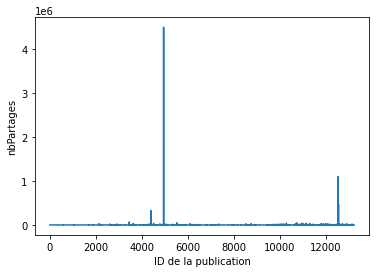

In [12]:
quick_numeric_column_info(data, 'nbPartages')

Minimum : 0
Maximum : 600
Moyenne : 62.007853205467036
Médiane : 53.0
La colunne durée contient 0(0.0%) valeurs manquantes.


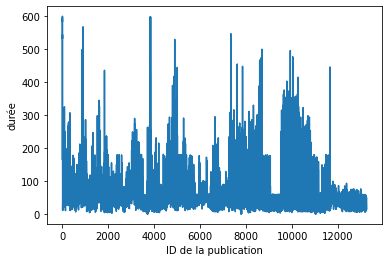

In [13]:
quick_numeric_column_info(data, 'durée')

In [14]:
def count_nan(data):
    total = len(data)
    
    for col_name in data.columns:
        missing = sum(data[col_name].isna())
        print("Column " + str(col_name) + " has " +str(missing) + "("+str(missing/total)+"%) missing values.")

count_nan(data)

Column compte has 0(0.0%) missing values.
Column description has 127(0.009589972060711318%) missing values.
Column nbCommentaires has 0(0.0%) missing values.
Column nbLikes has 0(0.0%) missing values.
Column nbVues has 0(0.0%) missing values.
Column nbPartages has 0(0.0%) missing values.
Column texteSurimposé has 4249(0.32084875028316845%) missing values.
Column url has 0(0.0%) missing values.
Column durée has 0(0.0%) missing values.
Column musiqueTitre has 12(0.0009061390923506759%) missing values.
Column musiqueArtiste has 12(0.0009061390923506759%) missing values.
Column pays has 0(0.0%) missing values.
Column date has 0(0.0%) missing values.
Column time has 0(0.0%) missing values.


In [15]:
def text_info(data, col_name):
    unique = data[col_name].unique()
    
    print("Il y a " + str(len(unique)) + " différents " + col_name + '.')
    print(unique)
    
    distribution = [sum(data[col_name]==u) for u in unique[:10]]
    
    plt.figure(figsize=(10,10))
    plt.barh(unique[:10], distribution)
    plt.show()

Il y a 34 différents compte.
['infobref' 'latribune' 'lavoixdunord' 'ledevoir' 'heidi.news' 'tdg.ch'
 'letemps' 'leprogres.lyon' 'sudouestfr' 'journalmetro'
 'radio.canada.info' 'rtlinfo' 'majmonactu' 'noovo.info' 'ouestfrance'
 'radpointca' '24heuresca' '_urbania' 'tvasports' 'rds.ca' 'lefigarofr'
 'miseajour' 'rtsinfo' 'loopsider' 'lequipe' 'tf1info' 'leparisien'
 'franceinfo' 'lemondefr' 'rmcsport' 'bfmtv' 'konbini' 'brutofficiel'
 'hugodecrypte']


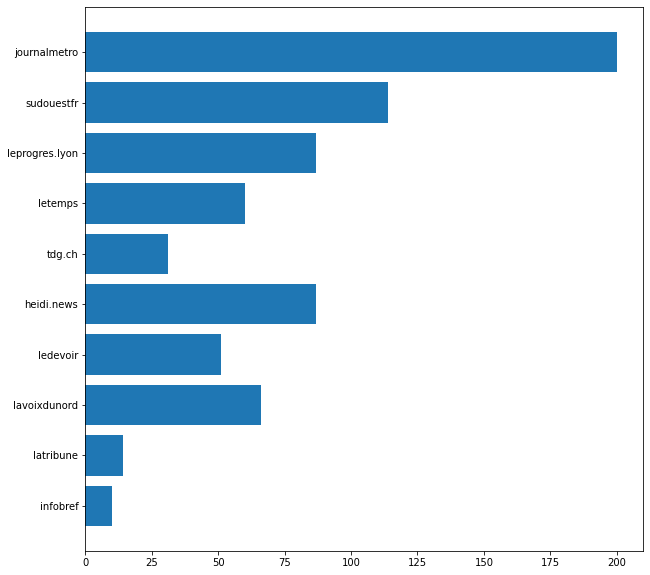

In [16]:
text_info(data, 'compte')

In [17]:
unique = data['musiqueTitre'].unique()

distribution = [sum(data["musiqueTitre"]==u) for u in unique]

ordered_zipped = [(u,d) for d,u in sorted(zip(distribution, unique))]

print(ordered_zipped[::-1][:10])

[('son original', 8915), ('original sound', 772), ('Violin', 293), ('Paris', 233), ('The Exorcist -The Main Title Theme', 110), ('Epic Music(863502)', 103), ('son original - Konbini', 75), ('Suspense, horror, piano and music box', 61), ('FEEL THE GROOVE', 48), ("13 Angels Standing Guard 'Round The Side Of Your Bed", 39)]


In [18]:
unique = data['musiqueArtiste'].unique()

distribution = [sum(data["musiqueArtiste"]==u) for u in unique]

ordered_zipped = [(u,d) for d,u in sorted(zip(distribution, unique))]

print(ordered_zipped[::-1][:10])

[('Konbini', 2148), ('Brut.', 2016), ('Franceinfo', 617), ('Le Parisien', 506), ('TF1 INFO', 454), ('BFMTV', 413), ('rmcsport', 384), ('Grooving Gecko', 293), ('Mise à Jour', 274), ('Loopsider', 260)]


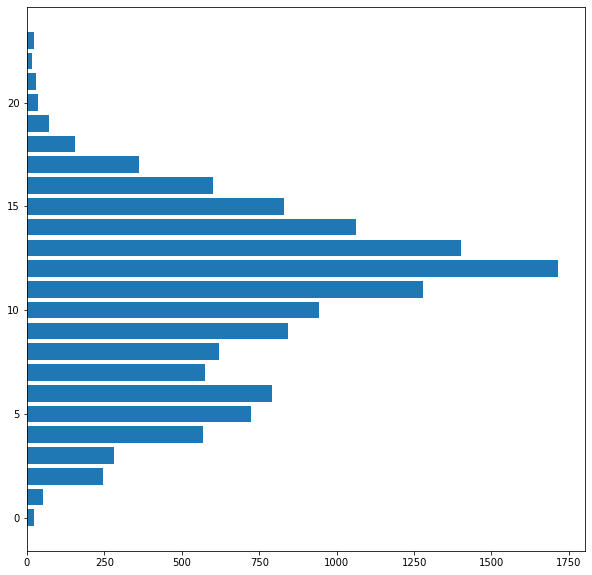

In [19]:
rounded_time_to_tenth = data['time'].apply(lambda x: str(x.hour))
unique = rounded_time_to_tenth.unique()

distribution = [sum(rounded_time_to_tenth==u) for u in unique]

# u, d = zip(*[(u,d) for u,d in sorted(zip(unique, distribution))])
plt.figure(figsize=(10,10))
plt.barh(list(map(int, unique)),distribution)
plt.show()

In [20]:
data.head()

,compte,description,nbCommentaires,nbLikes,nbVues,nbPartages,texteSurimposé,url,durée,musiqueTitre,musiqueArtiste,pays,date,time
0,infobref,Les prix de l’#immobilier au Canada vont baiss...,0,17,551,6,NaN,https://www.tiktok.com/@infobref/video/7170341...,166,son original,InfoBref,Canada,2022-11-26,10:06:51
1,infobref,#TWITTER survivra-t-il à #ELONMUSK? À retenir ...,0,1,137,0,NaN,https://www.tiktok.com/@infobref/video/7167370...,595,son original - InfoBref,InfoBref,Canada,2022-11-18,10:04:06
2,infobref,Le chemin du métavers est pénible pour Meta | ...,0,1,25,0,NaN,https://www.tiktok.com/@infobref/video/7164830...,577,son original,InfoBref,Canada,2022-11-11,13:42:35
3,infobref,#ElonMusk fait le ménage chez #Twitter | Nouve...,0,1,88,0,NaN,https://www.tiktok.com/@infobref/video/7162507...,534,son original,InfoBref,Canada,2022-11-05,08:25:36
4,infobref,À retenir dans l'actualité des #affaires: on v...,0,0,11,0,NaN,https://www.tiktok.com/@infobref/video/7160374...,587,son original,InfoBref,Canada,2022-10-30,14:28:43


In [21]:
data_mock = data
data_mock = data_mock.drop(columns=['description', 'texteSurimposé', 'url', 'durée', 'time', 'date', 'musiqueArtiste', 'musiqueTitre'])
data_mock = pd.DataFrame(data_mock.groupby([data_mock['compte'], data_mock['pays']], as_index=False).mean().round())
data_mock.head()

,compte,pays,nbCommentaires,nbLikes,nbVues,nbPartages
0,24heuresca,Canada,142.0,1563.0,42215.0,134.0
1,_urbania,Canada,24.0,1245.0,34860.0,66.0
2,bfmtv,France,235.0,14866.0,189769.0,276.0
3,brutofficiel,France,614.0,28579.0,440832.0,707.0
4,franceinfo,France,255.0,12032.0,145382.0,282.0


In [22]:
data_mock.to_csv("mock_data.csv")

In [23]:
data.head()

,compte,description,nbCommentaires,nbLikes,nbVues,nbPartages,texteSurimposé,url,durée,musiqueTitre,musiqueArtiste,pays,date,time
0,infobref,Les prix de l’#immobilier au Canada vont baiss...,0,17,551,6,NaN,https://www.tiktok.com/@infobref/video/7170341...,166,son original,InfoBref,Canada,2022-11-26,10:06:51
1,infobref,#TWITTER survivra-t-il à #ELONMUSK? À retenir ...,0,1,137,0,NaN,https://www.tiktok.com/@infobref/video/7167370...,595,son original - InfoBref,InfoBref,Canada,2022-11-18,10:04:06
2,infobref,Le chemin du métavers est pénible pour Meta | ...,0,1,25,0,NaN,https://www.tiktok.com/@infobref/video/7164830...,577,son original,InfoBref,Canada,2022-11-11,13:42:35
3,infobref,#ElonMusk fait le ménage chez #Twitter | Nouve...,0,1,88,0,NaN,https://www.tiktok.com/@infobref/video/7162507...,534,son original,InfoBref,Canada,2022-11-05,08:25:36
4,infobref,À retenir dans l'actualité des #affaires: on v...,0,0,11,0,NaN,https://www.tiktok.com/@infobref/video/7160374...,587,son original,InfoBref,Canada,2022-10-30,14:28:43


In [51]:
def desc_to_tags(desc):
    if type(desc) != str :
        return []
    desc = desc.replace('#', ' #').split()
    tags = [re.sub(r'[^\w\s]', '', tag.lower()) for tag in desc if tag.startswith("#")]
    return tags
    

In [63]:
data_tags = data
data_tags['tags'] = data_tags['description'].apply(desc_to_tags)
data_tags['n_tags'] = [len(tags) for tags in data['tags']]
data_tags.head()

,compte,description,nbCommentaires,nbLikes,nbVues,nbPartages,texteSurimposé,url,durée,musiqueTitre,musiqueArtiste,pays,date,time,tags,n_tags
0,infobref,Les prix de l’#immobilier au Canada vont baiss...,0,17,551,6,NaN,https://www.tiktok.com/@infobref/video/7170341...,166,son original,InfoBref,Canada,2022-11-26,10:06:51,"[immobilier, immobilierqc, immobilierquebec, i...",5
1,infobref,#TWITTER survivra-t-il à #ELONMUSK? À retenir ...,0,1,137,0,NaN,https://www.tiktok.com/@infobref/video/7167370...,595,son original - InfoBref,InfoBref,Canada,2022-11-18,10:04:06,"[twitter, elonmusk, actualité, affaires, finan...",6
2,infobref,Le chemin du métavers est pénible pour Meta | ...,0,1,25,0,NaN,https://www.tiktok.com/@infobref/video/7164830...,577,son original,InfoBref,Canada,2022-11-11,13:42:35,"[nouvelles, affaires, finances, meta]",4
3,infobref,#ElonMusk fait le ménage chez #Twitter | Nouve...,0,1,88,0,NaN,https://www.tiktok.com/@infobref/video/7162507...,534,son original,InfoBref,Canada,2022-11-05,08:25:36,"[elonmusk, twitter, actualités, affaires, affa...",6
4,infobref,À retenir dans l'actualité des #affaires: on v...,0,0,11,0,NaN,https://www.tiktok.com/@infobref/video/7160374...,587,son original,InfoBref,Canada,2022-10-30,14:28:43,[affaires],1


In [88]:
data_n_tags = data_tags
data_n_tags = data_n_tags.drop(columns=['description', 'texteSurimposé', 'url', 'durée','tags', 'time', 'date', 'musiqueArtiste', 'musiqueTitre', 'compte', 'pays'])
data_n_tags = pd.DataFrame(data_n_tags.groupby([data_n_tags['n_tags']], as_index=False).mean().round())
data_n_tags['n_tags'] = [ str(i)+" tags" for i in data_n_tags['n_tags']]
data_n_tags.head()

,n_tags,nbCommentaires,nbLikes,nbVues,nbPartages
0,0 tags,762.0,57537.0,507047.0,1178.0
1,1 tags,419.0,19454.0,303893.0,481.0
2,2 tags,376.0,18429.0,230408.0,448.0
3,3 tags,280.0,17251.0,209197.0,2082.0
4,4 tags,231.0,14658.0,171206.0,283.0


In [89]:
data_n_tags.to_csv("n_tags_data.csv")

In [64]:
data_tags.head()

,compte,description,nbCommentaires,nbLikes,nbVues,nbPartages,texteSurimposé,url,durée,musiqueTitre,musiqueArtiste,pays,date,time,tags,n_tags
0,infobref,Les prix de l’#immobilier au Canada vont baiss...,0,17,551,6,NaN,https://www.tiktok.com/@infobref/video/7170341...,166,son original,InfoBref,Canada,2022-11-26,10:06:51,"[immobilier, immobilierqc, immobilierquebec, i...",5
1,infobref,#TWITTER survivra-t-il à #ELONMUSK? À retenir ...,0,1,137,0,NaN,https://www.tiktok.com/@infobref/video/7167370...,595,son original - InfoBref,InfoBref,Canada,2022-11-18,10:04:06,"[twitter, elonmusk, actualité, affaires, finan...",6
2,infobref,Le chemin du métavers est pénible pour Meta | ...,0,1,25,0,NaN,https://www.tiktok.com/@infobref/video/7164830...,577,son original,InfoBref,Canada,2022-11-11,13:42:35,"[nouvelles, affaires, finances, meta]",4
3,infobref,#ElonMusk fait le ménage chez #Twitter | Nouve...,0,1,88,0,NaN,https://www.tiktok.com/@infobref/video/7162507...,534,son original,InfoBref,Canada,2022-11-05,08:25:36,"[elonmusk, twitter, actualités, affaires, affa...",6
4,infobref,À retenir dans l'actualité des #affaires: on v...,0,0,11,0,NaN,https://www.tiktok.com/@infobref/video/7160374...,587,son original,InfoBref,Canada,2022-10-30,14:28:43,[affaires],1


In [96]:
data_tag = data_tags.explode('tags')
data_tag = data_tag.drop(columns=['description', 'texteSurimposé', 'url', 'durée','n_tags', 'time', 'date', 'musiqueArtiste', 'musiqueTitre', 'compte', 'pays'])
data_tag = pd.DataFrame(data_tag.groupby([data_tag['tags']], as_index=False).agg({'nbVues':'mean', 'nbPartages':'size'}).round())
data_tag = data_tag[data_tag['nbPartages'] >= 25]
data_tag

,tags,nbVues,nbPartages
0,,66821.0,74
57,2021,52481.0,26
58,2022,62688.0,100
74,24heures,29346.0,55
203,actu,337092.0,198
...,...,...,...
9877,war,146242.0,37
9988,worldcup,301176.0,51
10077,zelensky,401658.0,47
10079,zemmour,416922.0,38


In [97]:
data_tag.to_csv("tags_data.csv")

In [98]:
data.head()

,compte,description,nbCommentaires,nbLikes,nbVues,nbPartages,texteSurimposé,url,durée,musiqueTitre,musiqueArtiste,pays,date,time,tags,n_tags
0,infobref,Les prix de l’#immobilier au Canada vont baiss...,0,17,551,6,NaN,https://www.tiktok.com/@infobref/video/7170341...,166,son original,InfoBref,Canada,2022-11-26,10:06:51,"[immobilier, immobilierqc, immobilierquebec, i...",5
1,infobref,#TWITTER survivra-t-il à #ELONMUSK? À retenir ...,0,1,137,0,NaN,https://www.tiktok.com/@infobref/video/7167370...,595,son original - InfoBref,InfoBref,Canada,2022-11-18,10:04:06,"[twitter, elonmusk, actualité, affaires, finan...",6
2,infobref,Le chemin du métavers est pénible pour Meta | ...,0,1,25,0,NaN,https://www.tiktok.com/@infobref/video/7164830...,577,son original,InfoBref,Canada,2022-11-11,13:42:35,"[nouvelles, affaires, finances, meta]",4
3,infobref,#ElonMusk fait le ménage chez #Twitter | Nouve...,0,1,88,0,NaN,https://www.tiktok.com/@infobref/video/7162507...,534,son original,InfoBref,Canada,2022-11-05,08:25:36,"[elonmusk, twitter, actualités, affaires, affa...",6
4,infobref,À retenir dans l'actualité des #affaires: on v...,0,0,11,0,NaN,https://www.tiktok.com/@infobref/video/7160374...,587,son original,InfoBref,Canada,2022-10-30,14:28:43,[affaires],1


In [135]:
def date_change(x):
    return x.strftime('%Y-%m')

data_date = data
# data_date['date'] = data_date['date'].apply(date_change)
# data_date = data_date[data_date['compte'] == 'hugodecrypte']
data_date = pd.DataFrame(data_date.groupby([data_date['date']], as_index=False).agg({'nbPartages':'size'}))
data_date

,date,nbPartages
0,2018-11,1
1,2018-12,19
2,2019-02,4
3,2019-03,8
4,2019-04,6
5,2019-05,2
6,2019-06,3
7,2019-07,1
8,2019-08,1
9,2019-09,4


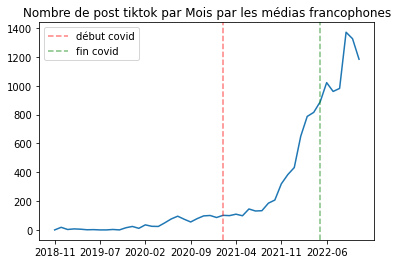

In [137]:
plt.plot(data_date['date'], data_date['nbPartages'], linestyle='solid')
plt.xticks(range(0,47,7))
plt.title('Nombre de post tiktok par Mois par les médias francophones')
plt.axvline(x = '2021-02', color = 'r', alpha = 0.5, linestyle='--', label = 'début covid')
plt.axvline(x = '2022-05', color = 'g', alpha = 0.5, linestyle='--', label = 'fin covid')
plt.legend()
plt.show()

In [8]:
def time_change(x):
    return x.strftime('%H')

data_time = data
data_time['time'] = data_time['time'].apply(time_change)
data_time = pd.DataFrame(data_time.groupby([data_time['time']], as_index=False).agg({'nbPartages':'size'}))
data_time

,time,nbPartages
0,00,23
1,01,52
2,02,244
3,03,282
4,04,568
5,05,722
6,06,790
7,07,574
8,08,620
9,09,843


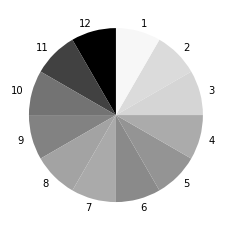

In [57]:
count = list(data_time["nbPartages"])
count = [ i / max(count) for i in count]
# count = np.array([(1,max(0,1-i-0.1),0) for i in count])
count = np.array([(1-i,1-i,1-i) for i in count])

labels_1 = [3, 2, 1, 12, 11, 10, 9, 8, 7, 6, 5, 4]
count_1 = count[labels_1]

plt.pie([ 1 for i in range(12)], colors=count_1, labels = labels_1)
plt.show()

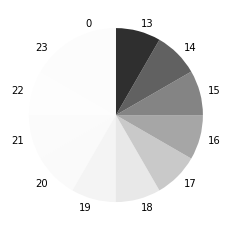

In [58]:
labels_2 = [15, 14, 13, 0, 23, 22,21, 20, 19, 18, 17, 16]
count_2 = count[labels_2]

plt.pie([ 1 for i in range(12)], colors=count_2, labels = labels_2)
plt.show()